In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
kidDataset = pd.read_csv("Kid.csv")
kidDataset.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [4]:
kidDataset.shape

(673, 18)

In [5]:
kidDataset.drop(columns=['Obs No.'])

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
5,0,24000,1,1,0,0,0,0,41,0,0,1,1,0,0,0,0
6,0,26000,1,1,1,0,1,0,20,0,1,1,1,1,1,0,0
7,0,38000,1,1,0,0,1,0,8,0,0,1,1,1,1,0,0
8,0,39000,1,0,1,1,0,0,17,0,0,0,0,1,1,0,0
9,0,49000,0,1,0,0,1,0,31,0,0,1,1,1,1,0,0


In [6]:
kidDataset.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

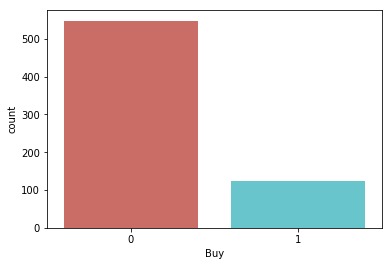

In [7]:
kidDataset.Buy.value_counts()
sns.countplot(x = 'Buy', data = kidDataset, palette = 'hls')
plt.show()

In [8]:
X = kidDataset[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = kidDataset['Buy']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [10]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred=logreg.predict(X_test)

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,   8],
       [  3,  18]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

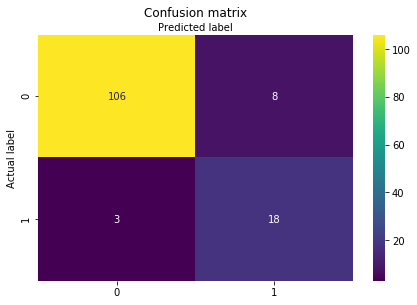

In [16]:
class_names = [1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9185185185185185
Precision: 0.6923076923076923
Recall: 0.8571428571428571


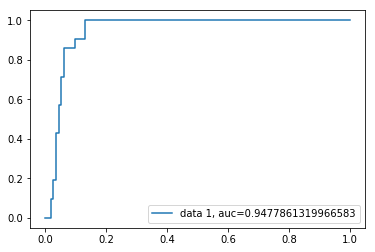

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()